# Projet 6 - Lapage

# I. Nettoyage de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
import seaborn as sns
import scipy.stats as st

In [ ]:
# préparation des données customer
customer = pd.read_csv('customers.csv')
len(customer)

In [ ]:
len(customer['client_id'].unique()) #client_id est unique

In [ ]:
customer.isnull().sum() # pas de valeur nulle dans le dataframe


In [ ]:
customer.describe() # pas d'anomalie visible

In [66]:
# préparation des données product
product = pd.read_csv('products.csv')
len(product)



3287

In [67]:
len(product['id_prod'].unique()) #product_id est unique

3287

In [68]:
product.isnull().sum() # Pas de valeur nulle

id_prod    0
price      0
categ      0
dtype: int64

In [69]:
product['price'].sort_values() # une anomalie du prix, le prix ne peut pas etre negatif


731      -1.00
2355      0.62
2272      0.62
370       0.66
1211      0.77
         ...  
2779    233.54
1436    236.99
394     247.22
724     254.44
947     300.00
Name: price, Length: 3287, dtype: float64

In [70]:
product.drop(product.index[731], inplace=True) #supprimer la ligne de donnees ayant le prix en negatif
product.describe() # pas d'anomalie visible

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [71]:
# préparation des données transaction
transaction = pd.read_csv('transactions.csv')
len(transaction)
transaction[transaction.duplicated()] # verifier s'il y a des doublons


,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [72]:
transaction = transaction.drop_duplicates() # supprimer les doublons


In [73]:
transaction.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [74]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679406 non-null  object
 1   date        679406 non-null  object
 2   session_id  679406 non-null  object
 3   client_id   679406 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [75]:
# Il est impossible de changer le type pour date d'object en date, car il y a des dates qui contiennent un STR test
contain_values = transaction[transaction['date'].str.contains('test')].index 

print (contain_values)

Int64Index([  3019,   5138,   9668,  10728,  15292,  19312,  23678,  23696,
             35433,  38646,  46966,  49254,  50853,  53701,  69450,  72006,
             82253,  85486,  91133,  92354,  92684,  92834,  93736,  98809,
            100621, 103119, 105735, 109738, 117281, 134253, 145501, 153653,
            154294, 181233, 185962, 191051, 191288, 194141, 195265, 195616,
            198976, 201530, 218690, 246139, 246980, 254282, 259417, 260133,
            274430, 276375, 298459, 307832, 312697, 315083, 321268, 338563,
            339591, 366499, 384047, 392443, 404272, 414522, 459899, 482523,
            499389, 504032, 544772, 561543, 566416, 577324, 593065, 607892,
            626049, 670680],
           dtype='int64')


In [76]:
transaction = transaction.drop(contain_values) # Supprimer les données de teste dans transaction

In [77]:
transaction.describe()

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-05-20 13:21:29.043970,s_118668,c_1609
freq,2252,1,14,25488


In [78]:
# jointure des donnees de transaction et product
df1 = pd.merge(transaction, product, how = 'left' , left_on = 'id_prod' , right_on = 'id_prod') 

In [79]:
df1.isnull().sum() # verifier s'il y a des valeurs nulles

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
dtype: int64

In [80]:
df1[df1.isnull().any(axis=1)].id_prod.unique() # product ID 0_2245 n'a pas d'info sur price ni categ

array(['0_2245'], dtype=object)

In [81]:
df1.loc[df1['id_prod'] == '0_2245','categ'] = 0 # Remplir la categorie 0 pour les produits 0_2245,
#nous laissons son prix en null car nous n'arrivons pas a savoir la vraie valeur

In [82]:
# Jointure des 3 dataframes en 1 df
df = pd.merge(df1, customer, how = 'left' , left_on = 'client_id' , right_on = 'client_id')
df.isnull().sum() # pas de valeur nulle


id_prod         0
date            0
session_id      0
client_id       0
price         221
categ           0
sex             0
birth           0
dtype: int64

In [83]:
df['date'] = pd.to_datetime(df['date']) # Transfer object to date format for column date
df.dtypes
df.sort_values(by=['date'])

,id_prod,date,session_id,client_id,price,categ,sex,birth
480501,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967
428350,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960
462563,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988
488153,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989
438944,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956
...,...,...,...,...,...,...,...,...
184602,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,21.92,1.0,f,1996
588008,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994
130140,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985
550293,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953


In [84]:
# Ajouter 3 nouveaux colonnes Year, Month, Year_month
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['year_month'] = pd.to_datetime(df['date']).dt.to_period('M')
df['year_month_day'] = pd.to_datetime(df['date']).dt.to_period('D')
df.dtypes

id_prod                   object
date              datetime64[ns]
session_id                object
client_id                 object
price                    float64
categ                    float64
sex                       object
birth                      int64
year                       int64
month                      int64
year_month             period[M]
year_month_day         period[D]
dtype: object

In [85]:
df

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month,year_month,year_month_day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022,5,2022-05,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022,2,2022-02,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,2022,6,2022-06,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021,6,2021-06,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023,1,2023-01,2023-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022,1,2022-01,2022-01-15
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022,3,2022-03,2022-03-19
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022,12,2022-12,2022-12-20
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021,7,2021-07,2021-07-16


# II. Analyse des données

## 1. différents indicateurs et graphiques autour du CA

In [86]:
df['price'].sum() # CA total 11853728.68

11853728.68

In [87]:
# creation of a new dataframe for CA mensuel
dfca = df.groupby(['year_month'])['price'].sum().reset_index() 
dfca = dfca.rename(columns={"price": "ca"})
dfca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   year_month  24 non-null     period[M]
 1   ca          24 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 512.0 bytes


In [88]:
dfca # Details des CA mensuels

,year_month,ca
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


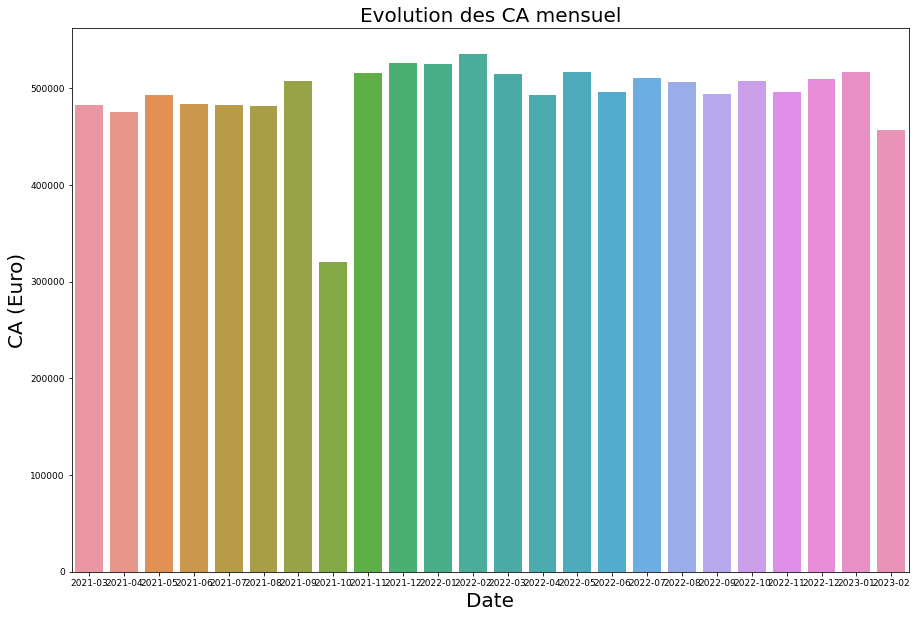

In [89]:
# Bar chat Graphique: Evolution des CA mensuel
plt.figure(figsize=(15,10))

gpca=sns.barplot(data=dfca, x='year_month', y='ca')
gpca.axes.set_title("Evolution des CA mensuel",fontsize=20)
gpca.set_xlabel("Date",fontsize=20)
gpca.set_ylabel("CA (Euro)",fontsize=20)
gpca.tick_params(labelsize=9)
plt.show()
print()

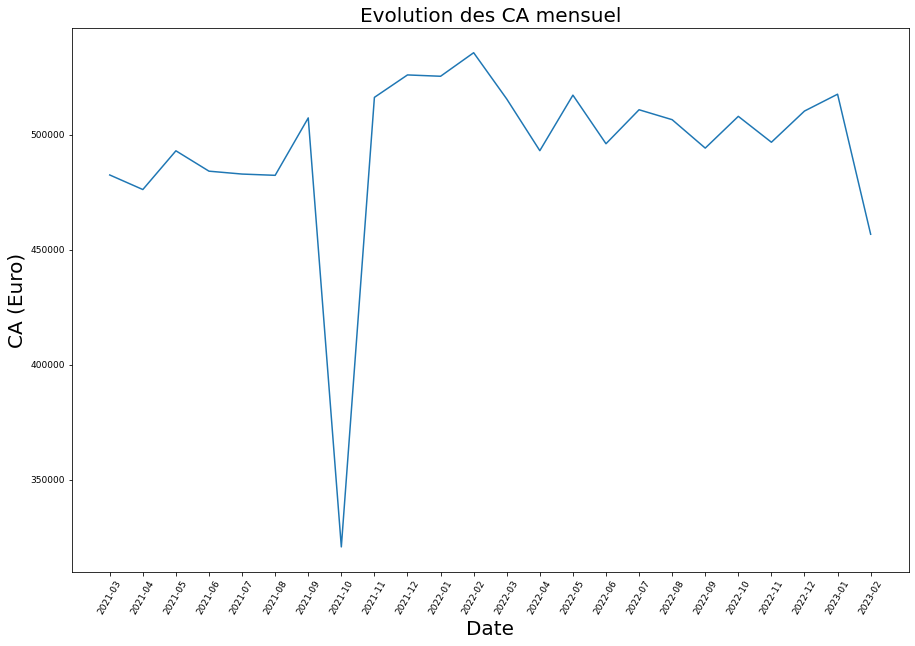

In [90]:
# Line chat Graphique: Evolution des CA mensuel

plt.figure(figsize=(15,10))
g = sns.lineplot(x=dfca.index, y="ca", data=dfca)
g.set_xticks(range(len(dfca)))
g.set_xticklabels(dfca.year_month, rotation=60)
g.axes.set_title("Evolution des CA mensuel",fontsize=20)
g.set_xlabel("Date",fontsize=20)
g.set_ylabel("CA (Euro)",fontsize=20)
g.tick_params(labelsize=9)


## 2. l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale CA

In [91]:
# creation of a new dataframe for CA journalier
dfcaj = df.groupby(['year_month_day'])['price'].sum().reset_index() 
dfcaj = dfcaj.rename(columns={"price": "caj"})

In [92]:
dfcaj

,year_month_day,caj
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


Text(0, 0.5, 'CA (Euro)')

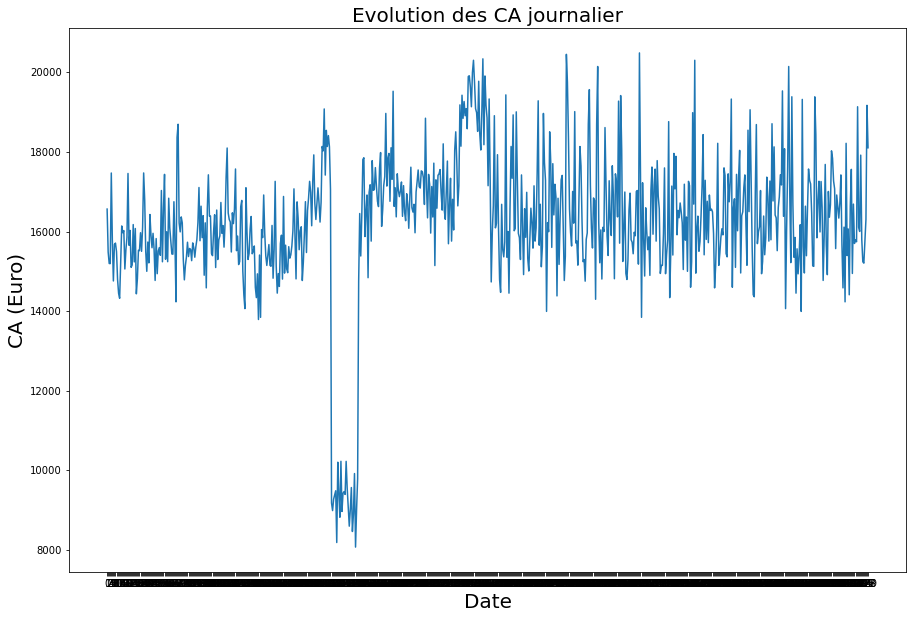

In [93]:
# Line chat Graphique: Evolution des CA journalier

plt.figure(figsize=(15,10))
gj = sns.lineplot(x=dfcaj.index, y="caj", data=dfcaj)
gj.set_xticks(range(len(dfcaj)))
#gj.set_xticklabels(dfcaj.year_month_day, rotation=60)
gj.axes.set_title("Evolution des CA journalier",fontsize=20)
gj.set_xlabel("Date",fontsize=20)
gj.set_ylabel("CA (Euro)",fontsize=20)
#gj.tick_params(labelsize=9)

In [94]:
dfcaj['caj']

0      16565.22
1      15486.45
2      15198.69
3      15196.07
4      17471.37
         ...   
725    15207.89
726    15761.25
727    16304.72
728    19170.81
729    18105.15
Name: caj, Length: 730, dtype: float64

In [95]:
# Creation de nouveau data frame dfma qui contient des CA en moyenne mobile de 7 jours
arr = dfcaj['caj']
window_size = 7
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o
#consider every window of size 3
while i < len(arr) - window_size + 1:
  
    # Calculate the average of current window
    window_average = round(np.sum(arr[i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  
dfma = pd.DataFrame (moving_averages, columns = ['moving_averages'])
dfma

,moving_averages
0,15780.47
1,15653.94
2,15685.95
3,15728.55
4,15672.13
...,...
719,16488.78
720,16006.75
721,16035.02
722,16487.57


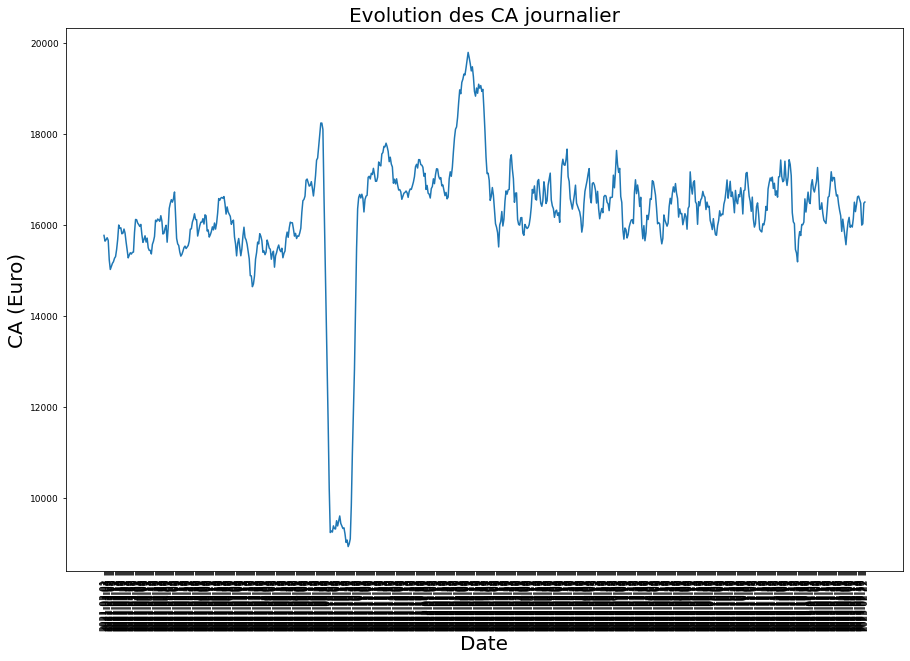

In [96]:
# Line chat Graphique: Evolution des CA journalier en moyenne mobilen de 7 jours

plt.figure(figsize=(15,10))
gma = sns.lineplot(x=dfma.index, y="moving_averages", data=dfma)
gma.set_xticks(range(len(dfma)))
gma.set_xticklabels(dfcaj.year_month_day[:len(dfma)], rotation=90)
gma.axes.set_title("Evolution des CA journalier",fontsize=20)
gma.set_xlabel("Date",fontsize=20)
gma.set_ylabel("CA (Euro)",fontsize=20)
gma.tick_params(labelsize=9)

## 3.  un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie

In [97]:
df0 = df.loc[df['categ'] == 0]
df1 = df.loc[df['categ'] == 1]
df2 = df.loc[df['categ'] == 2]

df0.groupby(['id_prod'])['price'].sum().sort_values() # les tops et les flops produits de la categorie 0

id_prod
0_2245        0.00
0_1539        0.99
0_1284        1.38
0_1653        1.98
0_807         1.99
            ...   
0_1417    21372.12
0_1451    21689.15
0_1414    22287.00
0_1421    23008.49
0_1441    23452.65
Name: price, Length: 2293, dtype: float64

In [98]:
df1.groupby(['id_prod'])['price'].sum().sort_values() # les tops et les flops produits de la categorie 1

id_prod
1_420       14.24
1_224       19.80
1_470       21.64
1_473       26.91
1_404       29.55
           ...   
1_498    49731.36
1_383    51486.24
1_414    51949.40
1_369    54025.48
1_395    54356.25
Name: price, Length: 737, dtype: float64

In [99]:
df2.groupby(['id_prod'])['price'].sum().sort_values() # les tops et les flops produits de la categorie 2

id_prod
2_81        86.99
2_23       115.99
2_98       149.74
2_93       157.98
2_107      203.94
           ...   
2_209    56971.86
2_102    60736.78
2_112    65407.76
2_135    69334.95
2_159    94893.50
Name: price, Length: 236, dtype: float64

## 4. quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz

In [100]:
# Creation of new data frame: le nombre des achats par client
dfcn = df['client_id'].value_counts().reset_index() 
dfcn = dfcn.rename(columns={"client_id": "nb_achats", "index": "client_id"})
dfcn.describe()

# le client qui achat le plus souvent est 25488 fois
# Notre client depense en moyenne 79 fois
# 50% des clients depensent plus que 50 fois

,nb_achats
count,8600.000000
mean,78.992093
std,312.437204
min,1.000000
25%,27.000000
50%,51.000000
75%,96.000000
max,25488.000000


In [101]:
dfcn

,client_id,nb_achats
0,c_1609,25488
1,c_6714,9187
2,c_3454,6773
3,c_4958,5195
4,c_3263,403
...,...,...
8595,c_4478,1
8596,c_5962,1
8597,c_4223,1
8598,c_6292,1


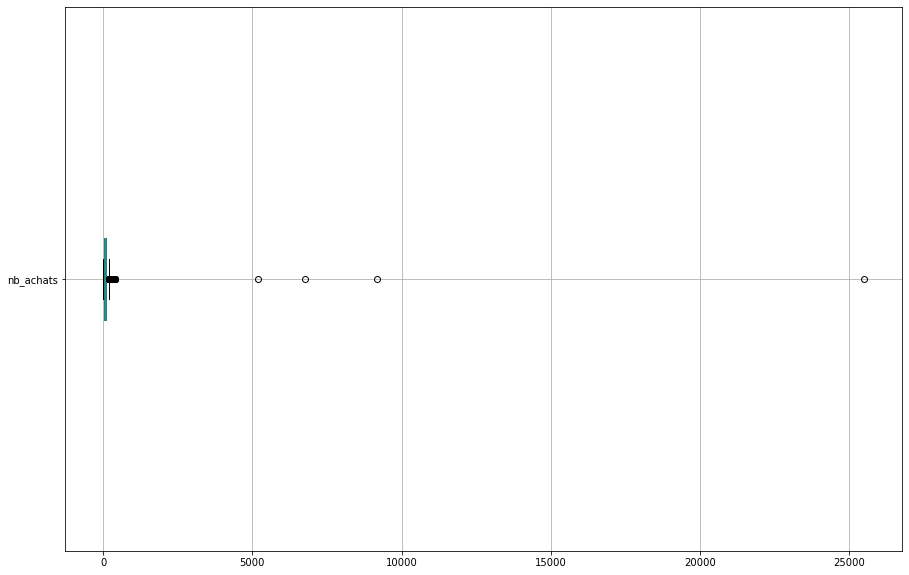

In [102]:
plt.figure(figsize=(15,10))
dfcn.boxplot(column="nb_achats", vert=False)
plt.show()

In [103]:
# outliers est 5000
#Supprimer les outliers de dataframe
dfcn =dfcn[dfcn['nb_achats']<5000]

<AxesSubplot:xlabel='nb_achats', ylabel='Count'>

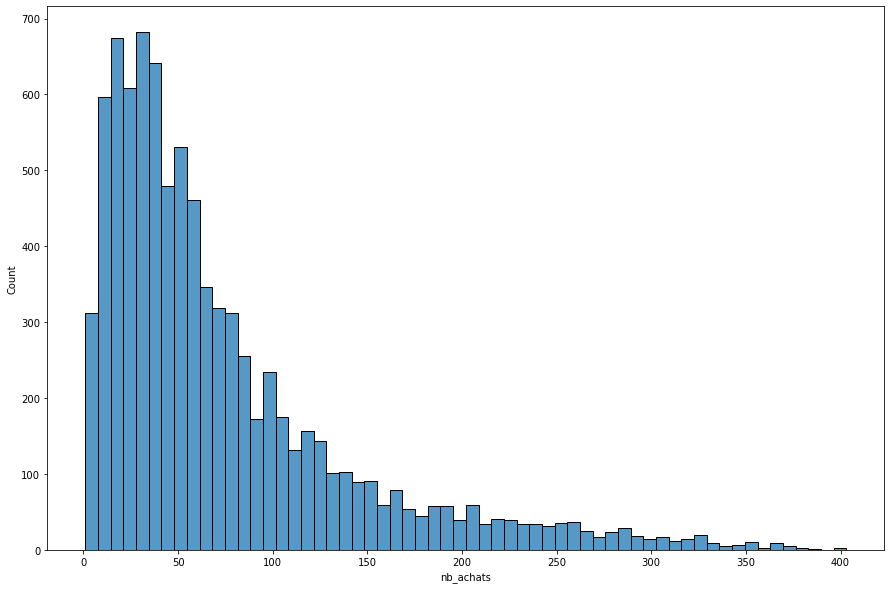

In [104]:
# Distribution des nombres d'achats par client
plt.figure(figsize=(15,10))
sns.histplot(data=dfcn, x="nb_achats")

In [105]:
# creation of new data frame with client ID and total transaction amount for each client
dfcca = df.groupby(['client_id'])['price'].sum().reset_index() 
dfcca.describe()

# nous avons 8600 clients au total
# le client qui depense le plus est 324033 Euros
# le client qui depense le moins est 6 Euros
# Notre client depense en moyenne 1378 Euros
# 50% des clients depensent plus que 1027 Euros

,price
count,8600.000000
mean,1378.340544
std,5182.542488
min,6.310000
25%,547.630000
50%,1027.020000
75%,1779.500000
max,324033.350000


In [106]:
dfcca

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8595,c_995,189.41
8596,c_996,1625.58
8597,c_997,1490.01
8598,c_998,2779.88


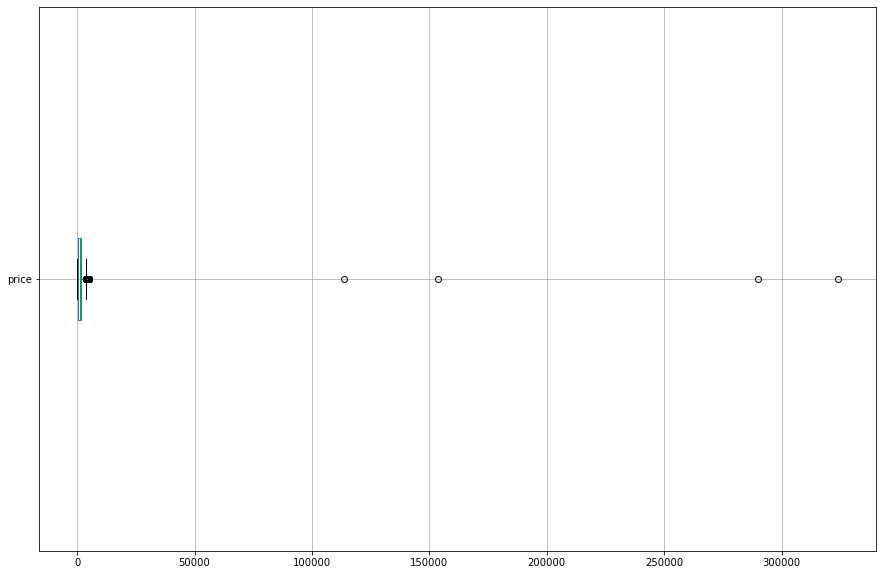

In [107]:
# La repartition des CA par client

plt.figure(figsize=(15,10))
dfcca.boxplot(column="price", vert=False)
plt.show()

In [108]:
# utiliser Skewed distribution pour détecter les anomalies potentiels
# Use Inter-Quartile Range (IQR) proximity rule.
# The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.
#where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

Q1 = np.percentile(dfcca['price'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(dfcca['price'], 75, interpolation = 'midpoint')
  
outlier = Q3+1.5*(Q3-Q1)
print(outlier)


3627.49


In [109]:
# Les outliers sont 100000, supprimer les outliers de data frame dfcca
dfcca = dfcca[dfcca['price']< 100000]
dfcca.max()

client_id      c_999
price        5276.87
dtype: object

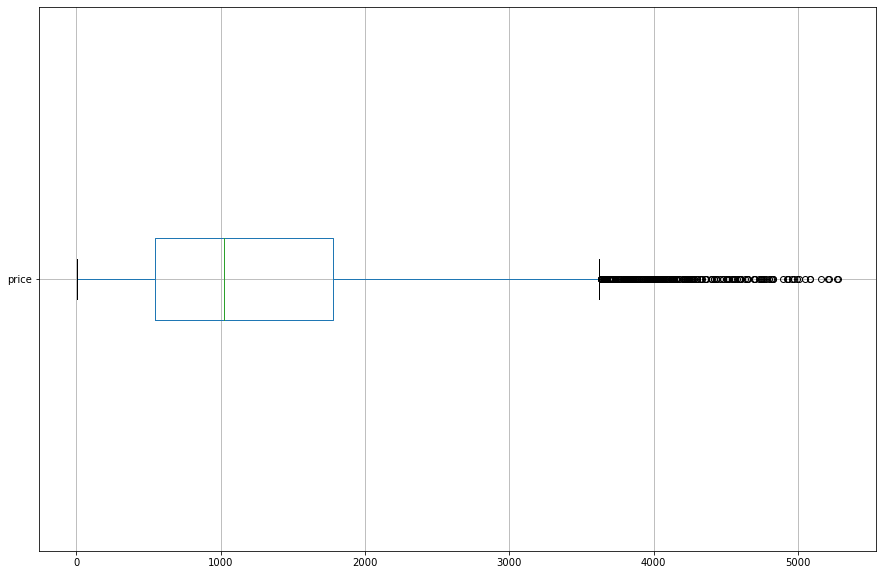

In [110]:
# La repartition des CA par client apres la suppression des outliers

plt.figure(figsize=(15,10))
dfcca.boxplot(column="price", vert=False)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

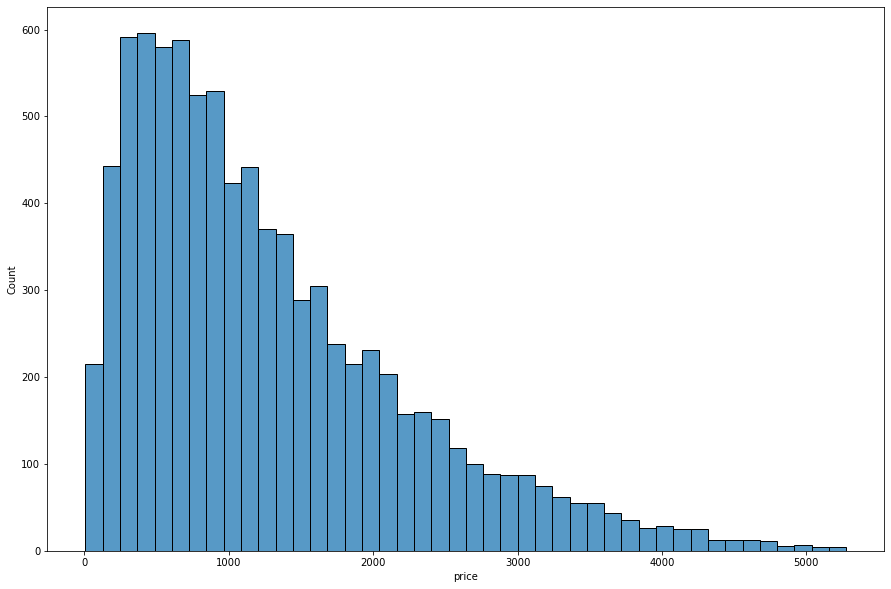

In [111]:
# Distribution des montants d'achats par client
plt.figure(figsize=(15,10))
sns.histplot(data=dfcca, x="price")

In [112]:
# Creation of a new data frame dflorenz

dflorenz = dfcca['price'].sort_values() # display the transaction of each client in order of transaction's price
dflorenz.reset_index(drop=True, inplace=True) # Add new index for the data frame
dflorenz

0          6.31
1          8.30
2          9.98
3         11.06
4         11.20
         ...   
8591    5155.77
8592    5208.82
8593    5214.05
8594    5271.62
8595    5276.87
Name: price, Length: 8596, dtype: float64

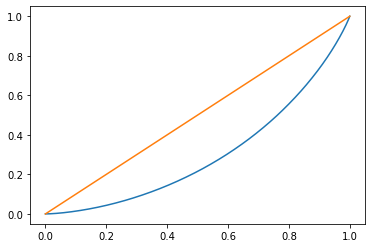

In [113]:
# ensure your arr is sorted from lowest to highest values first!
arr = np.array(dflorenz)


def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)


lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

## 5. le lien entre le genre d’un client et les catégories des livres achetés 

In [114]:
# preparation des donnees sex & categ
X = 'sex'
Y = 'categ'

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,206220,114899,17283,338402
m,209460,112270,19200,340930
Total,415680,227169,36483,679332


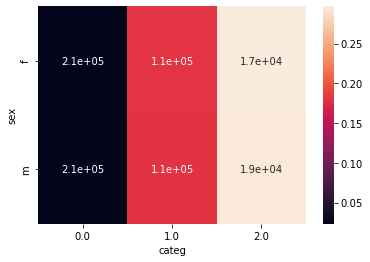

In [115]:
# heatmap pour visualiser le lien entre le genre d’un client et les catégories des livres achetés
# le graphique montre qu'il n'y a pas de grande difference pour les hommes et les femmes sur les categories de livres achetes
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

## 6. le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés

In [116]:
df

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month,year_month,year_month_day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022,5,2022-05,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022,2,2022-02,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,2022,6,2022-06,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021,6,2021-06,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023,1,2023-01,2023-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022,1,2022-01,2022-01-15
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022,3,2022-03,2022-03-19
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022,12,2022-12,2022-12-20
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021,7,2021-07,2021-07-16


In [117]:
# Creation of a new colume for clients' ages
df['age']= 2022 - df['birth']

In [118]:
df

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month,year_month,year_month_day,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022,5,2022-05,2022-05-20,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022,2,2022-02,2022-02-02,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,2022,6,2022-06,2022-06-18,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021,6,2021-06,2021-06-24,22
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023,1,2023-01,2023-01-11,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022,1,2022-01,2022-01-15,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022,3,2022-03,2022-03-19,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022,12,2022-12,2022-12-20,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021,7,2021-07,2021-07-16,36


In [119]:
# creation of data to learn about the clients' ages
dfage = df.groupby(['client_id'])['age'].value_counts()
dfage

client_id  age
c_1        67      39
c_10       66      58
c_100      30       8
c_1000     56     125
c_1001     40     102
                 ... 
c_995      67      14
c_996      52      95
c_997      28      59
c_998      21      53
c_999      58      46
Name: age, Length: 8600, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

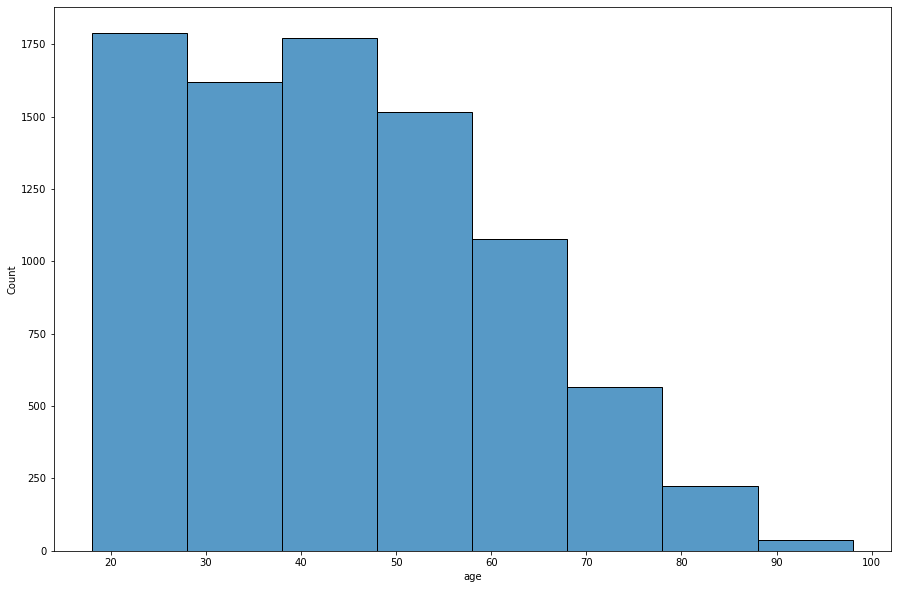

In [120]:
# Clients' ages distribution, regroupe par 10 ans
plt.figure(figsize=(15,10))
sns.histplot(data=dfage, x="age", binwidth=10)

In [121]:
dfclient = df.groupby(['client_id'])
dfclient

### 6.1 le lien entre l’âge des clients et le montant total des achats

In [122]:
# montnat total des achats par groupe d'age
dfam = df.groupby(['age'])['price'].sum().reset_index()
dfam

,age,price
0,18,609013.69
1,19,178195.78
2,20,184177.35
3,21,178497.70
4,22,165007.98
...,...,...
71,89,5254.35
72,90,5043.19
73,91,2815.45
74,92,4013.87


<AxesSubplot:xlabel='age', ylabel='price'>

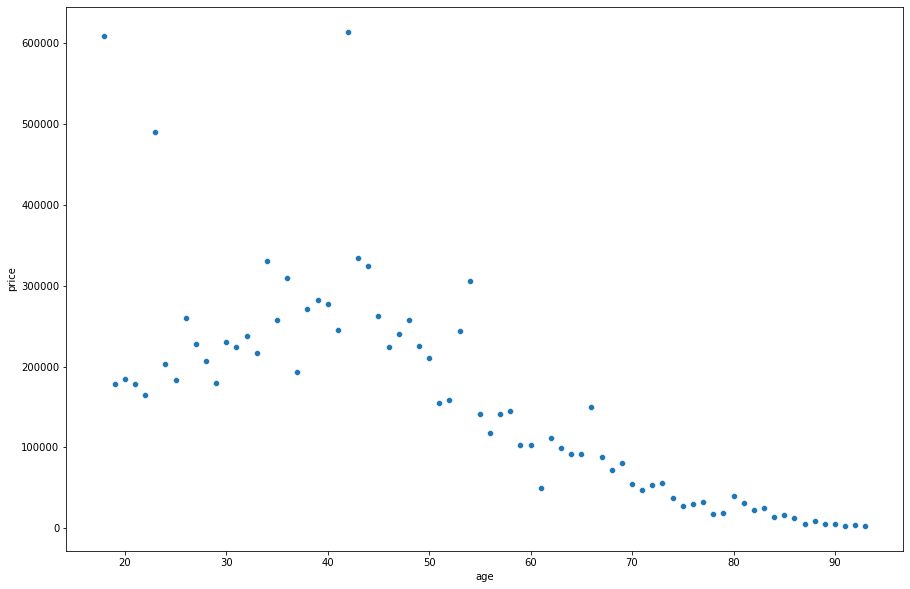

In [123]:
# montnat total des achats par age regroupé
plt.figure(figsize=(15,10))
sns.scatterplot(x="age", y="price", data=dfam)

In [124]:
df = df.dropna() # supprimer les valeurs nulles
print(st.pearsonr(df["age"],df["price"])[0])
print(np.cov(df["age"],df["price"],ddof=0)[1,0])

# D'apres les resultats, la corelation entre age et montant total n'est pas significative
# une legere relation negative entre ces 2 elements, plus agé moins dépensé


-0.2094647811017666
-52.11952637337284


### 6.2 le lien entre l’âge des clients et la fréquence d’achat

In [140]:
# creation of a data frame : age & frequency
dfaf = df['age'].value_counts().reset_index()
dfaf = dfaf.rename(columns={"age": "frequency", "index": "age"})

In [137]:
dfaf

,age,frequency
0,42,47409
1,34,25000
2,43,24878
3,44,24659
4,36,23465
...,...,...
71,90,311
72,87,271
73,92,226
74,93,201


<AxesSubplot:xlabel='age', ylabel='frequency'>

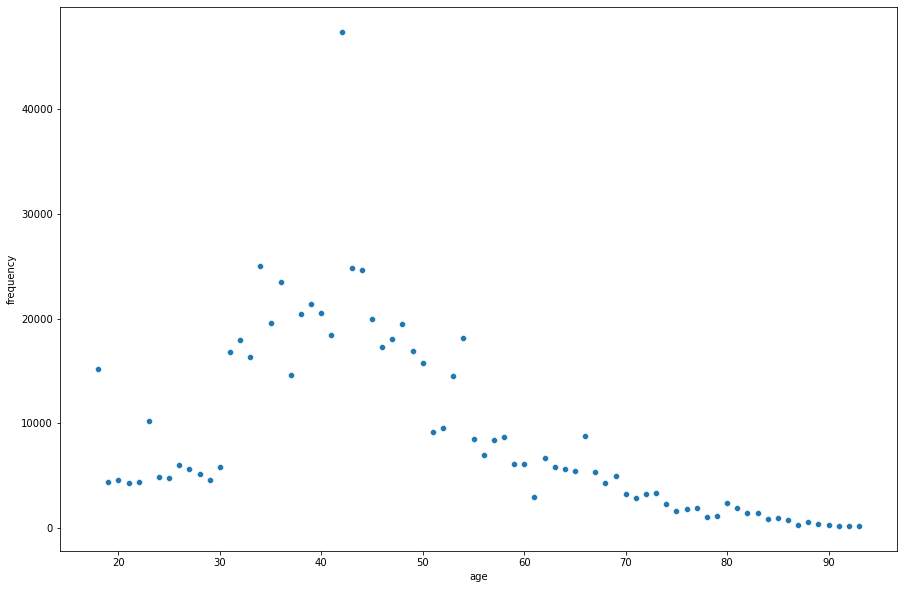

In [142]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="age", y="frequency", data=dfaf)

In [141]:
print(st.pearsonr(dfaf["age"],dfaf["frequency"])[0])
print(np.cov(dfaf["age"],dfaf["frequency"],ddof=0)[1,0])

# D'apres les resultats, la corelation entre age et montant total n'est pas significative
# une legere relation negative entre ces 2 elements, plus agé dépensé moins fréquemment

-0.5337344271238333
-101072.70394736843


### 6.3 le lien entre l’âge des clients et la taille du panier moyen

In [147]:
# Creation of a data frame with panier moyen
dfapm = dfam.merge(dfaf, on = 'age')
dfapm['pm']= dfapm['price']/dfapm['frequency']
dfapm

,age,price,frequency,pm
0,18,609013.69,15149,40.201577
1,19,178195.78,4371,40.767737
2,20,184177.35,4584,40.178305
3,21,178497.70,4252,41.979704
4,22,165007.98,4413,37.391339
...,...,...,...,...
71,89,5254.35,326,16.117638
72,90,5043.19,311,16.216045
73,91,2815.45,170,16.561471
74,92,4013.87,226,17.760487


<AxesSubplot:xlabel='age', ylabel='pm'>

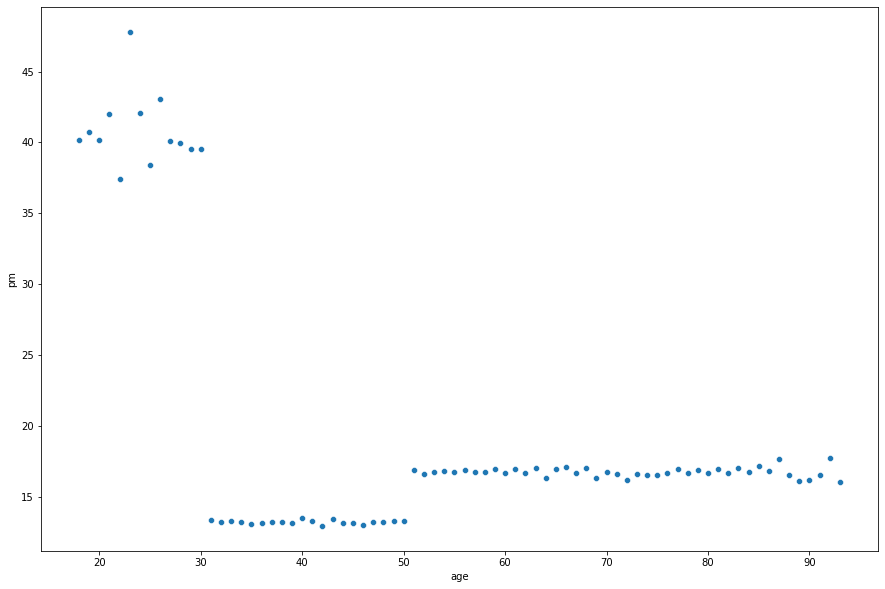

In [148]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="age", y="pm", data=dfapm)

# D'après le scatterplot, nous avons constaté 3 comportements très différents :
# 1. Moins de 30 ans, panier moyen le plus haut, plus de 35 euros
# 2. 30 - 50 ans, panier moyen le plus bas, panier moyen assez homogenre, en dessous de 15 euros
# 2. Plus 50 ans, panier moyen assez homogenre, entre 15 et 20 euros

### 6.4 le lien entre l’âge des clients et les catégories des livres achetés

In [151]:
df

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month,year_month,year_month_day,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022,5,2022-05,2022-05-20,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022,2,2022-02,2022-02-02,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,2022,6,2022-06,2022-06-18,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021,6,2021-06,2021-06-24,22
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023,1,2023-01,2023-01-11,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022,1,2022-01,2022-01-15,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022,3,2022-03,2022-03-19,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022,12,2022-12,2022-12-20,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021,7,2021-07,2021-07-16,36


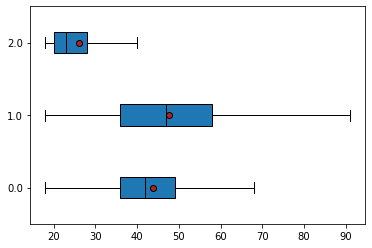

In [155]:
# Utiliser methode ANOVA
Y = "categ" # qualitative
Z = "age" # quantitative

modalites = df[Y].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[Y]==m][Z])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

# Les clients dans les 30 ans preferent le produit du categorie 2
# Les clients dans les 45 ans preferent le produit du categorie 0
# Les clients dans les 50 ans preferent le produit du categorie 1
# le produit du categorie 1 a une popularite sur les clients de tous les ages
# le produit du categorie 2 attire particulierement les clients jeunes de moins de 40 ans

In [159]:
Y = "categ" # qualitative
Z = "age" # quantitative


def eta_squared(y,z):
    moyenne_z = z.mean()
    classes = []
    for classe in y.unique():
        yi_classe = z[y==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_z)**2 for yj in z])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_z)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df[Y],df[Z])

# ANOVA - (Partial) Eta Squared
# η2 = 0.01 indicates a small effect; η2 = 0.06 indicates a medium effect; η2 = 0.14 indicates a large effect.
# comme notre η2 est 0.12, qui montre qu'il y a une forte lien entre age et categorie d'achat

0.11903391947235277